In [77]:
# Imports
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import pandas as pd
import keras
import tensorflow
import os
import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [78]:
# Dataset conversion imports
import glob
import PIL as pillow
from PIL import Image
import numpy as np
from sklearn import svm

In [79]:
# Loading training dataset/labels
csv = pd.read_csv('/home/ik/workspace/train.csv')
image = csv['fn']
label = csv['label']

In [80]:
# Image preprocessing, turning images into grey scale, using just one channel for better usage of processor
# TODO grey scale convert

In [65]:
# Dataset conversion into numpy array
tic = time.time()
dataset_dir = '/home/ik/workspace/train'
filelist = glob.glob(os.path.join(dataset_dir,'train/*.jpg'))
dataset_numpy = np.array([np.array(Image.open(fname)) for fname in filelist])
print(round(time.time() - tic,3)) # cpu, ouch

544.852


image shape: (48896, 64, 64, 3)


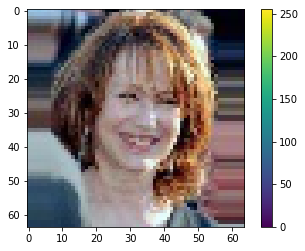

In [81]:
# Visualizing a converted image
print('image shape:',dataset_numpy.shape)
plt.imshow(dataset_numpy[0])
plt.colorbar()

In [91]:
# Splitting into training and test
image_train, image_test, label_train, label_test = train_test_split(dataset_numpy, label, test_size=0.25)
total_classifiers = 4
classifiers = ['rotated_left', 'rotated_right', 'upside_down', 'upright']

In [92]:
# Creating the model using sequential layers
#    using Flatten to be the input
#    using Dense layer with 128 neurons to be the first hidden layer
#    using dropout layer
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # 20% adormecido
    keras.layers.Dense(10,  activation=tensorflow.nn.softmax)
    ])

In [93]:
# Compiling the model
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [94]:
historico = modelo.fit(image_train,
           label_train,
           epochs=5,
          validation_split=0.2)

Train on 29337 samples, validate on 7335 samples
Epoch 1/5


ValueError: could not convert string to float: 'rotated_right'